# Cisco - Ariel University API Security Detection Challenge 2023


---



---



## Dataset 1 (Task 1)

The most basic API traffic containing the least number of attacks and endpoints. Will basically enable to have a soft start.

```
Dataset 1 baseline score:

                   precision    recall  f1-score   support

    Benign          0.95715   0.93922   0.99792       480
    Malware         0.99799   0.94129   0.96881       528

    accuracy                            0.96825      1008
    macro avg       0.96860   0.96960   0.96824      1008
    weighted avg    0.97000   0.96825   0.96827      1008

```

[Link to the Dataset 1](https://drive.google.com/file/d/15MxHRAdwPXCENACwn8wLMkb98ZCjDeh6/view?usp=share_link)

## Baseline code

### Imports and global settings

In [1]:
# Imports, settings and first dataset view
from sklearn.svm import SVC
import pandas as pd
import seaborn as sns
import numpy as np
import json

from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter

from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.decomposition import TruncatedSVD

import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as ps
import matplotlib.pyplot as plt
import plotly.io as pio
pio.templates.default = "plotly_dark"
pio.templates['plotly_dark'].layout.autosize = False
pio.templates['plotly_dark'].layout.width = 1_000
pio.templates['plotly_dark'].layout.height = 800

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import make_scorer, recall_score

from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import VotingClassifier

from sklearn.ensemble import StackingClassifier

from urllib.parse import urlparse

import pickle

# from ipywidgets import widgets

# Set pandas to show all columns when you print a dataframe
pd.set_option('display.max_columns', None)

# Global setting here you choose the dataset number and classification type for the model
dataset_number = 1  # Options are [1, 2, 3, 4]
test_type = 'label'  # Options are ['label', 'attack_type']

# Read the json and read it to a pandas dataframe object, you can change these settings
with open(f'./dataset_{str(dataset_number)}_train.json') as file:
    raw_ds = json.load(file)
df = pd.json_normalize(raw_ds, max_level=2)

# Shoe the first five lines of the dataframe to see if everything was read accordingly
df.head()

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,request.Attack_Tag,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,request.headers.Cookie,response.headers.Location,request.headers.Content-Length,response.headers.Set-Cookie
0,127.0.0.1:5000,Mozilla/5.0 (X11; Linux i586; rv:31.0) Gecko/2...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=o_GpTr9HHJJuQyahzYzRI32s-1_JPvkhLtweRRmjP...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/static/download_txt/../....,,Directory Traversal,200 OK,application/json,72,200,"{""error"": ""File ../../../../../../../../window...",NaN,NaN,NaN,NaN
1,127.0.0.1:5000,Mozilla/5.0 (X11; OpenBSD amd64; rv:28.0) Geck...,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document,['ck=UYrrg74Ph7dWrlCA9rgXy6qtYSwxuCZK_nBsCp-j5...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/categories/check/name/2467,,NaN,404 NOT FOUND,application/json,41,404,"{""error"": ""Category name not found""}",NaN,NaN,NaN,NaN
2,127.0.0.1:5000,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:24....,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document,['ck=wiMIulyT7VOEQKT-4D5ChZAjxiTdRXAYUaz_OQ3Rc...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/cookielogin,,Cookie Injection,200 OK,text/html; charset=utf-8,105,200,<h1>Logged in as Cedric</h1><form method='POST...,username=gASVyQAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhb...,NaN,NaN,NaN
3,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; rv:27.3) Gecko/20...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=pQiHhJSsvZ9vw-yR8NmaTGKzqUBsn583t3Q6zWEoz...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/states/get/region/6117,,NaN,404 NOT FOUND,application/json,30,404,"{""error"": ""Not a region""}",NaN,NaN,NaN,NaN
4,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:25...,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document${jndi:ldaphttps://mitsui-jyuku.mixh.j...,['ck=vGDsymCRgtDms448zxnOurIjvy46d_4aAGJRG6gmh...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/categories/check/name/2508,,LOG4J,404 NOT FOUND,application/json,41,404,"{""error"": ""Category name not found""}",NaN,NaN,NaN,NaN


### Basic dataset label arrangements

In [2]:
# Fill the black attack tag lines with "Benign" string
df['request.Attack_Tag'] = df['request.Attack_Tag'].fillna('Benign')
df['attack_type'] = df['request.Attack_Tag']

# This function will be used in the lambda below to iterate over the label columns
# You can use this snippet to run your own lambda on any data with the apply() method


def categorize(row):
    if row['request.Attack_Tag'] == 'Benign':
        return 'Benign'
    return 'Malware'


df['label'] = df.apply(lambda row: categorize(row), axis=1)

# After finishing the arrangements we delete the irrelevant column
df.drop('request.Attack_Tag', axis=1, inplace=True)

df

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,request.headers.Cookie,response.headers.Location,request.headers.Content-Length,response.headers.Set-Cookie,attack_type,label
0,127.0.0.1:5000,Mozilla/5.0 (X11; Linux i586; rv:31.0) Gecko/2...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=o_GpTr9HHJJuQyahzYzRI32s-1_JPvkhLtweRRmjP...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/static/download_txt/../....,,200 OK,application/json,72,200,"{""error"": ""File ../../../../../../../../window...",NaN,NaN,NaN,NaN,Directory Traversal,Malware
1,127.0.0.1:5000,Mozilla/5.0 (X11; OpenBSD amd64; rv:28.0) Geck...,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document,['ck=UYrrg74Ph7dWrlCA9rgXy6qtYSwxuCZK_nBsCp-j5...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/categories/check/name/2467,,404 NOT FOUND,application/json,41,404,"{""error"": ""Category name not found""}",NaN,NaN,NaN,NaN,Benign,Benign
2,127.0.0.1:5000,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:24....,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document,['ck=wiMIulyT7VOEQKT-4D5ChZAjxiTdRXAYUaz_OQ3Rc...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/cookielogin,,200 OK,text/html; charset=utf-8,105,200,<h1>Logged in as Cedric</h1><form method='POST...,username=gASVyQAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhb...,NaN,NaN,NaN,Cookie Injection,Malware
3,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; rv:27.3) Gecko/20...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=pQiHhJSsvZ9vw-yR8NmaTGKzqUBsn583t3Q6zWEoz...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/states/get/region/6117,,404 NOT FOUND,application/json,30,404,"{""error"": ""Not a region""}",NaN,NaN,NaN,NaN,Benign,Benign
4,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:25...,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document${jndi:ldaphttps://mitsui-jyuku.mixh.j...,['ck=vGDsymCRgtDms448zxnOurIjvy46d_4aAGJRG6gmh...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/categories/check/name/2508,,404 NOT FOUND,application/json,41,404,"{""error"": ""Category name not found""}",NaN,NaN,NaN,NaN,LOG4J,Malware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277,127.0.0.1:5000,Mozilla/5.0 (Windows NT 10.0) AppleWebKit/537....,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.5",none,websocket,?1,document,['ck=wKm-iDQeCXGjwXGrGJvfzWzs5VYbnWSP75B6BjFz1...,"Mon, 21 Nov 2022 18:39:51 GMT",POST,http://127.0.0.1:5000/cookielogin,,302 FOUND,text/html; charset=utf-8,211,302,<!doctype html>\n<html lang=en>\n<title>Redire...,username=gASVyQAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhb...,/cookielogin,0,username=gASVKgAAAAAAAACMCF9fbWFpbl9flIwGUGVyc...,Cookie Injection,Malware
4278,127.0.0.1:5000,Mozilla/5.0 (Windows NT 5.1; rv:31.0) Gecko/20...,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document,['ck=oyXTP1KfNdMwWb_jIYEQYKzE9RZALsuCGCtJtUlju...,"Mon, 21 Nov 2022 18:39:51 GMT",GET,http://127.0.0.1:5000/orders/get/id/7668,,404 NOT FOUND,application/json,36,404,"{""error"": ""Order ID not found""}",NaN,NaN,NaN,NaN,Benign,Benign
4279,127.0.0.1:5000,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.3...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=bfYOeMnpxlFA9F7ObPemhCXYmeYNbBteewfAWbnfy...,"Mon, 21 Nov 2022 18:39:52 GMT",POST,http://127.0.0.1:5000/cookielogin,,302 FOUND,text/html; charset=utf-8,211,302,<!doctype html>\n<html lang=en>\n<title>Redire...,username=gASVyAAAAAAAAACMCGJ1aWx0aW5zlIw

In [3]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4282 entries, 0 to 4281
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   request.headers.Host             4282 non-null   object
 1   request.headers.User-Agent       4282 non-null   object
 2   request.headers.Accept-Encoding  4282 non-null   object
 3   request.headers.Accept           4282 non-null   object
 4   request.headers.Connection       4282 non-null   object
 5   request.headers.Accept-Language  4282 non-null   object
 6   request.headers.Sec-Fetch-Site   4282 non-null   object
 7   request.headers.Sec-Fetch-Mode   4282 non-null   object
 8   request.headers.Sec-Fetch-User   4282 non-null   object
 9   request.headers.Sec-Fetch-Dest   4282 non-null   object
 10  request.headers.Set-Cookie       4282 non-null   object
 11  request.headers.Date             4282 non-null   object
 12  request.method                   4

### Preprocessing Data

In [ ]:
list_of_nan_for_more_than_90 = []
for col in df.columns:
    if df[col].isna().sum() / df.shape[0] * 100 > 90:
        list_of_nan_for_more_than_90.append(col)
        print(f"Column {col} has {df[col].isna().sum()} NaN values, which is {round(df[col].isna().sum() / df.shape[0] * 100, 2)}%, and has {df[col].nunique()} unique values")

In [5]:
# Remove all NAN columns or replace with desired string
# This loop iterates over all of the column names which are all NaN
for column in df.columns[df.isna().any()].tolist():
    # df.drop(column, axis=1, inplace=True)
    df[column] = df[column].fillna('None')

# If you want to detect columns that may have only some NaN values use this:
# df.loc[:, df.isna().any()].tolist()

df.head()

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,request.headers.Cookie,response.headers.Location,request.headers.Content-Length,response.headers.Set-Cookie,attack_type,label
0,127.0.0.1:5000,Mozilla/5.0 (X11; Linux i586; rv:31.0) Gecko/2...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=o_GpTr9HHJJuQyahzYzRI32s-1_JPvkhLtweRRmjP...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/static/download_txt/../....,,200 OK,application/json,72,200,"{""error"": ""File ../../../../../../../../window...",None,None,None,None,Directory Traversal,Malware
1,127.0.0.1:5000,Mozilla/5.0 (X11; OpenBSD amd64; rv:28.0) Geck...,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document,['ck=UYrrg74Ph7dWrlCA9rgXy6qtYSwxuCZK_nBsCp-j5...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/categories/check/name/2467,,404 NOT FOUND,application/json,41,404,"{""error"": ""Category name not found""}",None,None,None,None,Benign,Benign
2,127.0.0.1:5000,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:24....,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document,['ck=wiMIulyT7VOEQKT-4D5ChZAjxiTdRXAYUaz_OQ3Rc...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/cookielogin,,200 OK,text/html; charset=utf-8,105,200,<h1>Logged in as Cedric</h1><form method='POST...,username=gASVyQAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhb...,None,None,None,Cookie Injection,Malware
3,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; rv:27.3) Gecko/20...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=pQiHhJSsvZ9vw-yR8NmaTGKzqUBsn583t3Q6zWEoz...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/states/get/region/6117,,404 NOT FOUND,application/json,30,404,"{""error"": ""Not a region""}",None,None,None,None,Benign,Benign
4,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:25...,"gzip, deflate, br",*/*,keep-alive,de,none,same-origin,?1,document${jndi:ldaphttps://mitsui-jyuku.mixh.j...,['ck=vGDsymCRgtDms448zxnOurIjvy46d_4aAGJRG6gmh...,"Mon, 21 Nov 2022 18:12:16 GMT",GET,http://127.0.0.1:5000/categories/check/name/2508,,404 NOT FOUND,application/json,41,404,"{""error"": ""Category name not found""}",None,None,None,None,LOG4J,Malware


In [6]:
# Detect columns that have the same value for all rows and print them
from collections import Counter
for column in df.columns:
    if len(Counter(df[column])) == 1:
        print(column)

request.headers.Host
request.headers.Accept
request.headers.Connection
request.headers.Sec-Fetch-User
request.body


In [7]:
# Check which features affect what using correlation heatmap

# Create a correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print(f"Columns to drop: {to_drop}")

Columns to drop: []


/tmp/ipykernel_36104/1757241736.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()
/tmp/ipykernel_36104/1757241736.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [8]:
# Create new features from URL
# Search for '$' in the headers

def create_features(df):
    df['url_path'] = df.apply(lambda x: urlparse(x["request.url"]).path, axis=1)
    df['url_query'] = df.apply(lambda x: urlparse(x["request.url"]).query, axis=1)
    df['url_netloc'] = df.apply(lambda x: urlparse(x["request.url"]).netloc, axis=1)
    df['url_scheme'] = df.apply(lambda x: urlparse(x["request.url"]).scheme, axis=1)
    df['url_length'] = df.apply(lambda x: len(x["request.url"]), axis=1)
    df['url_path_length'] = df.apply(lambda x: len(x["url_path"]), axis=1)
    df['url_query_length'] = df.apply(lambda x: len(x["url_query"]), axis=1)
    df['url_netloc_length'] = df.apply(lambda x: len(x["url_netloc"]), axis=1)
    df['contains_dollar'] = df.apply(lambda x: True if ('$' in x["request.headers.Sec-Fetch-Site"]
                                                        or '$' in x["request.headers.Sec-Fetch-Mode"]
                                                        or '$' in x["request.headers.Sec-Fetch-User"]
                                                        or '$' in x["request.headers.Sec-Fetch-Dest"]
                                                        or '$' in x["request.headers.Set-Cookie"]
                                                        or '$' in x["request.headers.Accept-Encoding"]
                                                        or '$' in x["request.headers.Accept-Language"]
                                                        or '$' in x["request.headers.User-Agent"])
    else False, axis=1)

create_features(df)

In [10]:
# Setting features for further feature extraction by choosing columns
# Some will be "simply" encoded via label encoding and others with HashingVectorizer

# # On these headers we will run a "simple" BOW
# SIMPLE_HEADERS = ['request.headers.Accept-Encoding',
#                   'request.headers.Host',
#                   'request.method',
#                   'request.headers.Accept-Language',
#                   'request.headers.Sec-Fetch-Site',
#                   'request.headers.Sec-Fetch-Mode',
#                   'request.headers.Sec-Fetch-Dest',
#                   'response.status',
#                   ]

# # On these headers we will run HashingVectorizer
# COMPLEX_HEADERS = ['request.headers.User-Agent',
#                    'request.headers.Set-Cookie',
#                    'request.headers.Date',
#                    'request.url',
#                    'response.headers.Content-Type',
#                    'response.body',
#                    'response.headers.Location',
#                    'request.headers.Content-Length',
#                    'request.headers.Cookie',
#                    'response.headers.Set-Cookie'
#                    ]

COLUMNS_TO_REMOVE = [
    'request.body',
    'response.headers.Content-Length',
    'request.headers.Date',
    'request.headers.Accept',
    'request.headers.Connection',
    'request.headers.Sec-Fetch-User',
]

# This is our main preprocessing function that will iterate over all of the chosen
# columns and run some feature extraction models


def vectorize_df(df):
    le = LabelEncoder()
    h_vec = HashingVectorizer(n_features=4)
    
    # Run LabelEncoder on all of the columns
    for column in df.columns.tolist():
        df[column] = le.fit_transform(df[column])
    for column in COLUMNS_TO_REMOVE:
        df.drop(column, axis=1, inplace=True)
    return df

df = vectorize_df(df)
df.head()

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.method,request.url,response.status,response.headers.Content-Type,response.status_code,response.body,request.headers.Cookie,response.headers.Location,request.headers.Content-Length,response.headers.Set-Cookie,attack_type,label,url_path,url_query,url_netloc,url_scheme,url_length,url_path_length,url_query_length,url_netloc_length,contains_dollar
0,0,27,0,1,0,0,0,3529,0,2372,0,0,0,187,0,1,1,0,2,1,1553,0,0,0,33,30,0,0,0
1,0,30,0,0,0,0,0,2052,0,28,4,0,4,181,0,1,1,0,0,0,28,0,0,0,16,16,0,0,0
2,0,32,0,0,0,0,0,4083,0,240,0,1,0,14,22,1,1,0,1,1,240,0,0,0,4,4,0,0,0
3,0,20,0,1,0,0,0,3579,0,2327,4,0,4,302,0,1,1,0,0,0,1508,0,0,0,12,12,0,0,0
4,0,18,0,0,0,0,29,3980,0,30,4,0,4,181,0,1,1,0,3,1,30,0,0,0,16,16,0,0,1


In [11]:
# Memory check (For large datasets sometimes the dataframe will exceed the computers resources)
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4282 entries, 0 to 4281
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   request.headers.Host             4282 non-null   int64
 1   request.headers.User-Agent       4282 non-null   int64
 2   request.headers.Accept-Encoding  4282 non-null   int64
 3   request.headers.Accept-Language  4282 non-null   int64
 4   request.headers.Sec-Fetch-Site   4282 non-null   int64
 5   request.headers.Sec-Fetch-Mode   4282 non-null   int64
 6   request.headers.Sec-Fetch-Dest   4282 non-null   int64
 7   request.headers.Set-Cookie       4282 non-null   int64
 8   request.method                   4282 non-null   int64
 9   request.url                      4282 non-null   int64
 10  response.status                  4282 non-null   int64
 11  response.headers.Content-Type    4282 non-null   int64
 12  response.status_code             4282 non-null  

In [12]:
# Choose the right features

features_list = df.columns.to_list()
features_list.remove('label')
features_list.remove('attack_type')
print(features_list)

# Recheck all datatype before training to see we don't have any objects in our features
# In this example our model must get features containing only numbers so we recheck to see if we missed anything during preprocessing
df.dtypes

['request.headers.Host', 'request.headers.User-Agent', 'request.headers.Accept-Encoding', 'request.headers.Accept-Language', 'request.headers.Sec-Fetch-Site', 'request.headers.Sec-Fetch-Mode', 'request.headers.Sec-Fetch-Dest', 'request.headers.Set-Cookie', 'request.method', 'request.url', 'response.status', 'response.headers.Content-Type', 'response.status_code', 'response.body', 'request.headers.Cookie', 'response.headers.Location', 'request.headers.Content-Length', 'response.headers.Set-Cookie', 'url_path', 'url_query', 'url_netloc', 'url_scheme', 'url_length', 'url_path_length', 'url_query_length', 'url_netloc_length', 'contains_dollar']


request.headers.Host               int64
request.headers.User-Agent         int64
request.headers.Accept-Encoding    int64
request.headers.Accept-Language    int64
request.headers.Sec-Fetch-Site     int64
request.headers.Sec-Fetch-Mode     int64
request.headers.Sec-Fetch-Dest     int64
request.headers.Set-Cookie         int64
request.method                     int64
request.url                        int64
response.status                    int64
response.headers.Content-Type      int64
response.status_code               int64
response.body                      int64
request.headers.Cookie             int64
response.headers.Location          int64
request.headers.Content-Length     int64
response.headers.Set-Cookie        int64
attack_type                        int64
label                              int64
url_path                           int64
url_query                          int64
url_netloc                         int64
url_scheme                         int64
url_length      

In [16]:
ss = StandardScaler()

In [17]:
pca = PCA(n_components=2)

In [18]:
# x_after_pca_in_2D=pca.fit_transform(df[features_list].to_numpy())
x_after_pca_in_2D = pca.fit_transform(ss.fit_transform(df[features_list].to_numpy()))

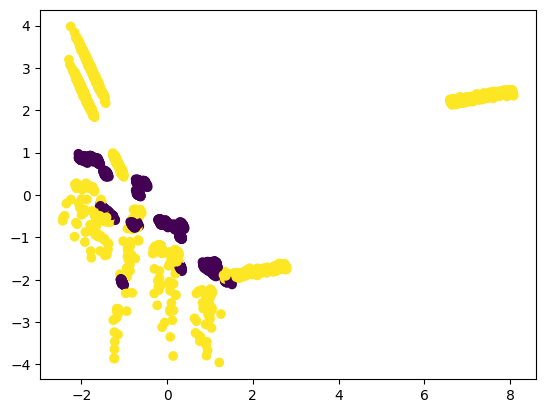

In [19]:
plt.scatter(x_after_pca_in_2D[:, 0], x_after_pca_in_2D[:, 1], c=df['label'].map({0: 0, 1: 1}))

In [20]:
pca = PCA()
pca.fit(ss.fit_transform(df[features_list].to_numpy()))

exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"},
    range_y=(0.98, 1.02),
    title="SVD Explained Variance Ratio"
)

As we can see we can compress the data into 20 components without loosing any information.

## Train Test Split

*   x_Train and y_Train will be used for _Train_
*   x_test and y_test.T will be used for _Test_

In [21]:
# We convert the feature list to a numpy array, this is required for the model fitting
X = df[features_list]#.to_numpy()

# This column is the desired prediction we will train our model on
y = np.stack(df[test_type])

# We split the dataset to train and test according to the required ration
# Do not change the test_size -> you can change anything else
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1765, random_state=42, stratify=y)

# We print the resulted datasets and count the difference
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
counter = Counter(y)
counter

(3526, 27) (3526,)
(756, 27) (756,)


Counter({1: 2264, 0: 2018})

In [22]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [23]:
pca = PCA(20)
pca.fit(X_train)
# x_train_pca = pca.transform(X_train)
x_train_pca_real = pca.transform(X_train)
x_train_pca = X_train

In [24]:
# x_test_pca = pca.transform(X_test)
x_test_pca_real = pca.transform(X_test)
x_test_pca = X_test

In [25]:
def plot_feature_importance(model):
    plt.figure(figsize=(10, 10))
    plt.title("Feature importances")
    plt.barh(range(x_train_pca.shape[1]), model.feature_importances_, align="center")
    plt.yticks(np.arange(x_train_pca.shape[1]), features_list)
    plt.ylim([-1, x_train_pca.shape[1]])
    plt.show()

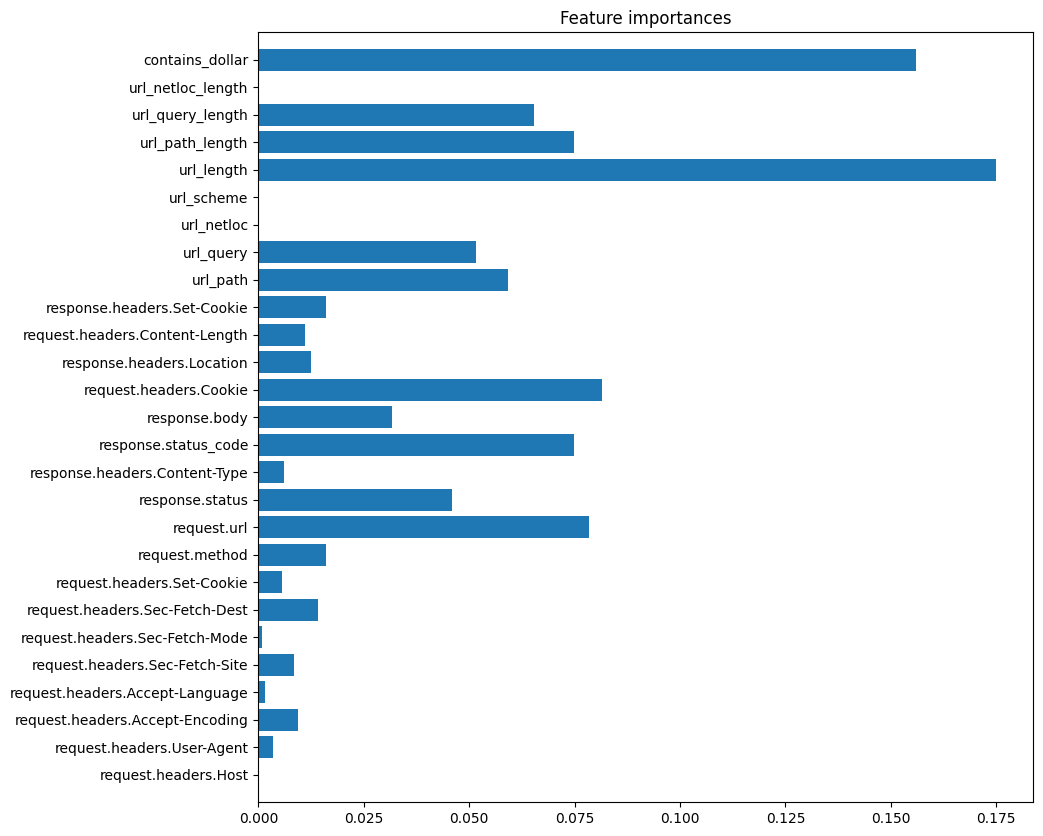

In [26]:
# Feature selection with Random Forest Classifier

rfc_fs = RandomForestClassifier(n_estimators=100, random_state=42)
rfc_fs.fit(x_train_pca, y_train)

# Plot the feature importances of the forest
plot_feature_importance(rfc_fs)

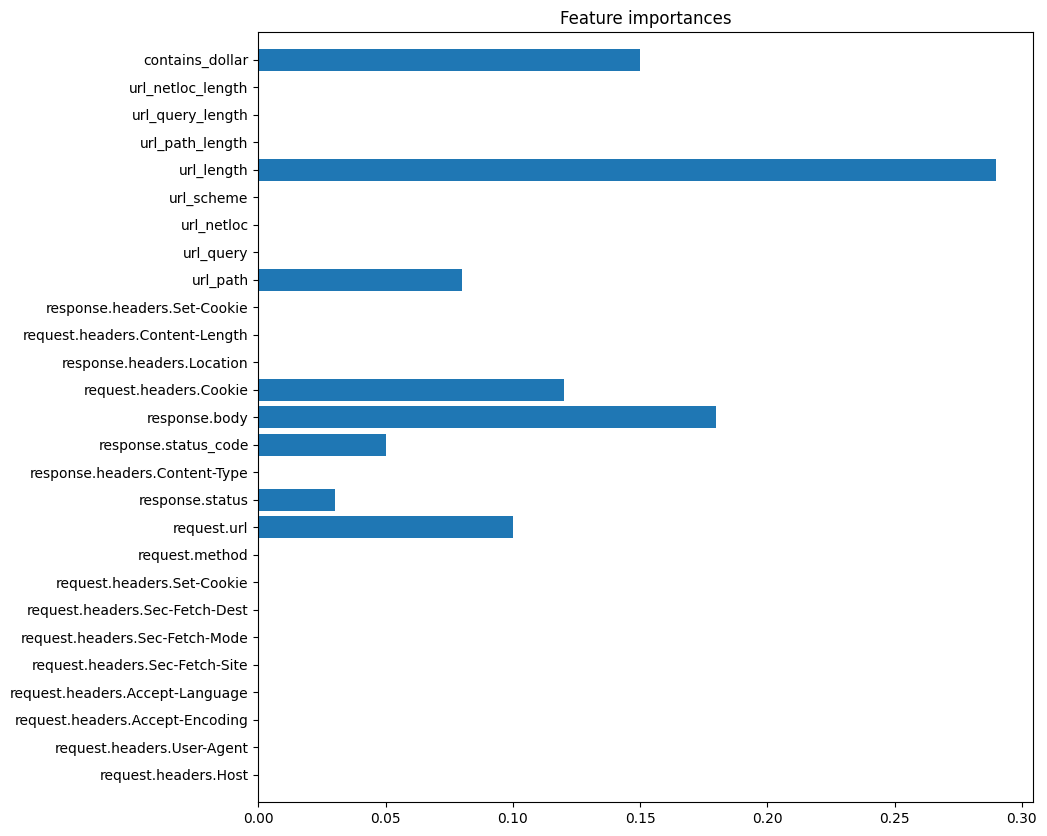

In [27]:
# Feature selection with AdaBoost Classifier

abc_fs = AdaBoostClassifier(n_estimators=100, random_state=42)
abc_fs.fit(x_train_pca, y_train)

# Plot the feature importances of the forest
plot_feature_importance(abc_fs)

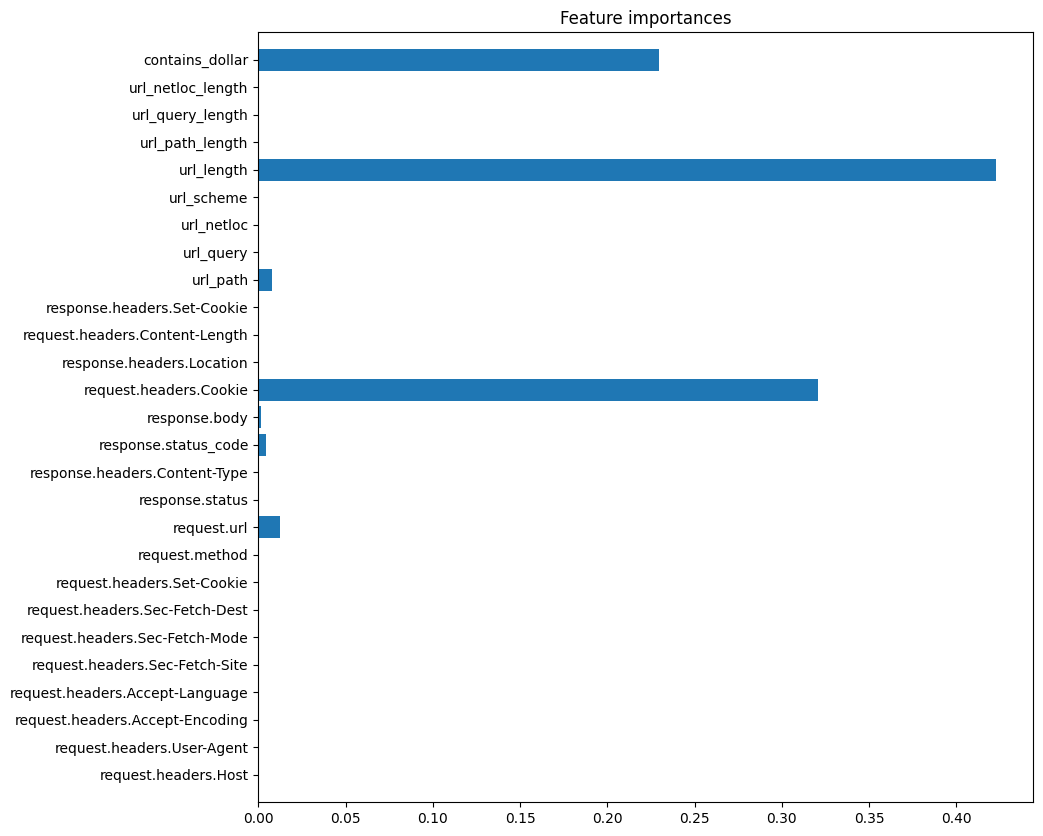

In [28]:
# Feature selection with Gradient Boosting Classifier

gbc_fs = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc_fs.fit(x_train_pca, y_train)

# Plot the feature importances of the forest
plot_feature_importance(gbc_fs)

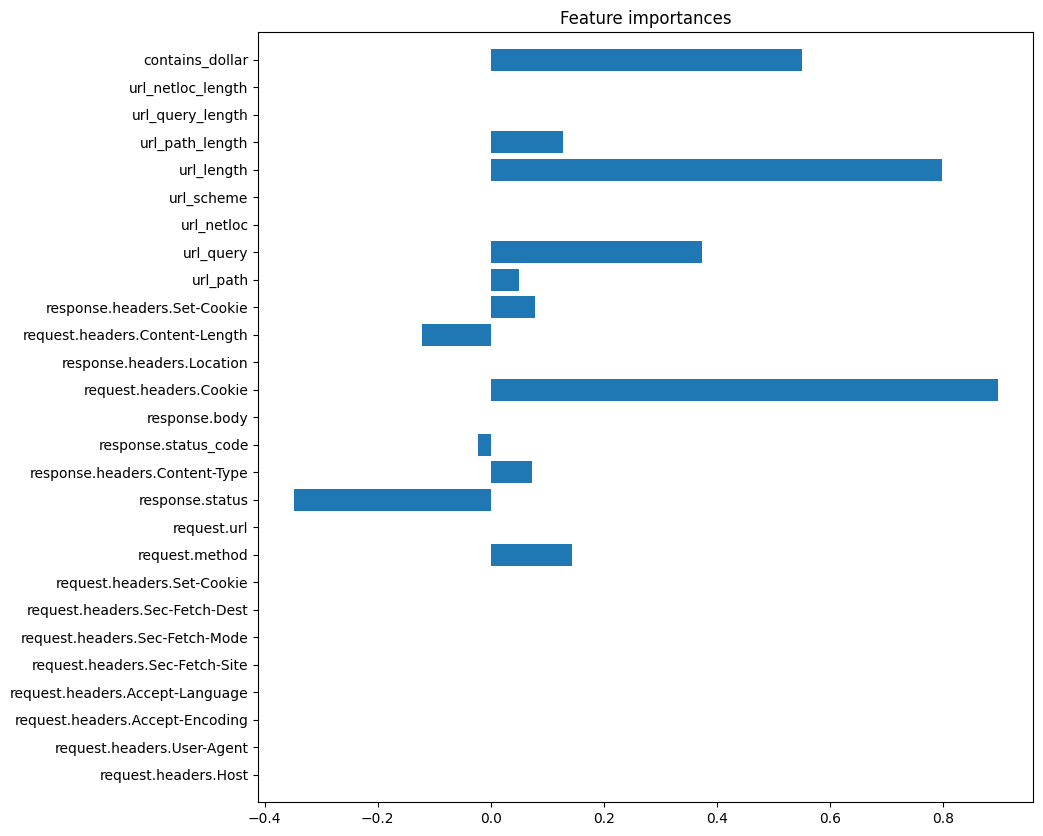

In [29]:
# Feature importance with Linear SVC
 
from sklearn.svm import LinearSVC
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(x_train_pca, y_train)
lsvc.coef_

# Plot feature importance with Linear SVC
plt.figure(figsize=(10, 10))
plt.title("Feature importances")
plt.barh(range(x_train_pca.shape[1]), lsvc.coef_[0], align="center")
plt.yticks(np.arange(x_train_pca.shape[1]), features_list)
plt.ylim([-1, x_train_pca.shape[1]])
plt.show()


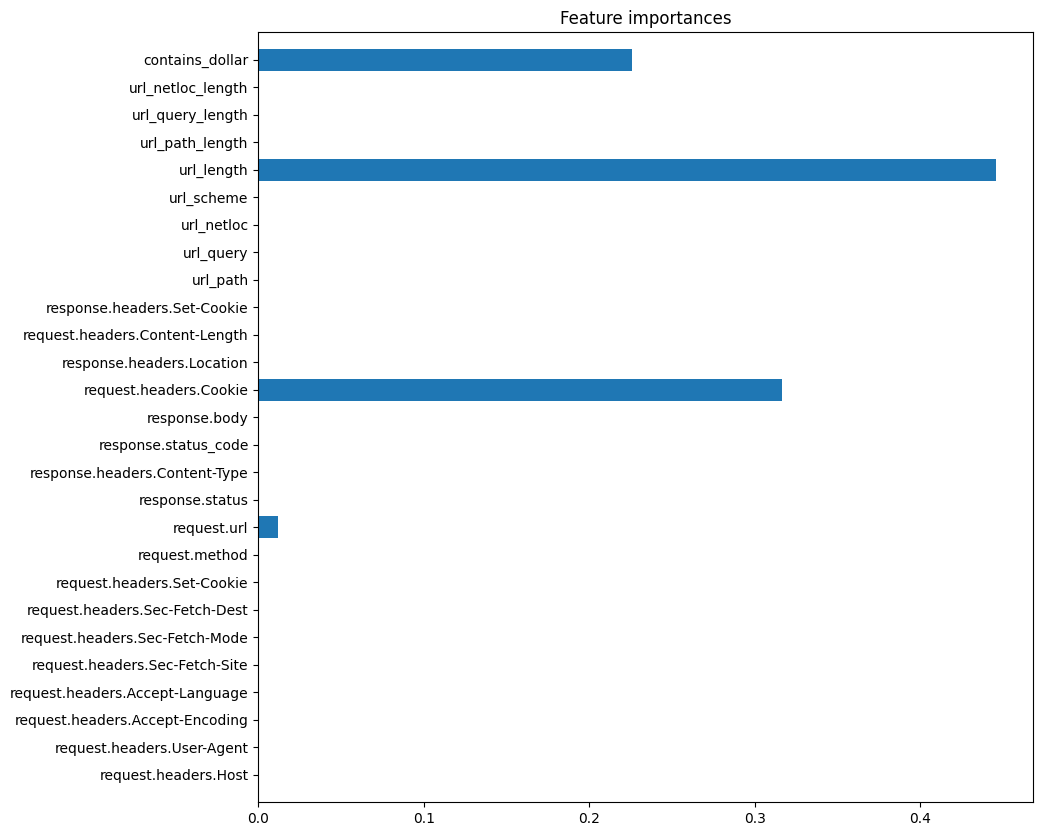

In [30]:
# Feature selection with Decision Tree Classifier

dtc_fs = DecisionTreeClassifier(random_state=42)
dtc_fs.fit(x_train_pca, y_train)

plot_feature_importance(dtc_fs)

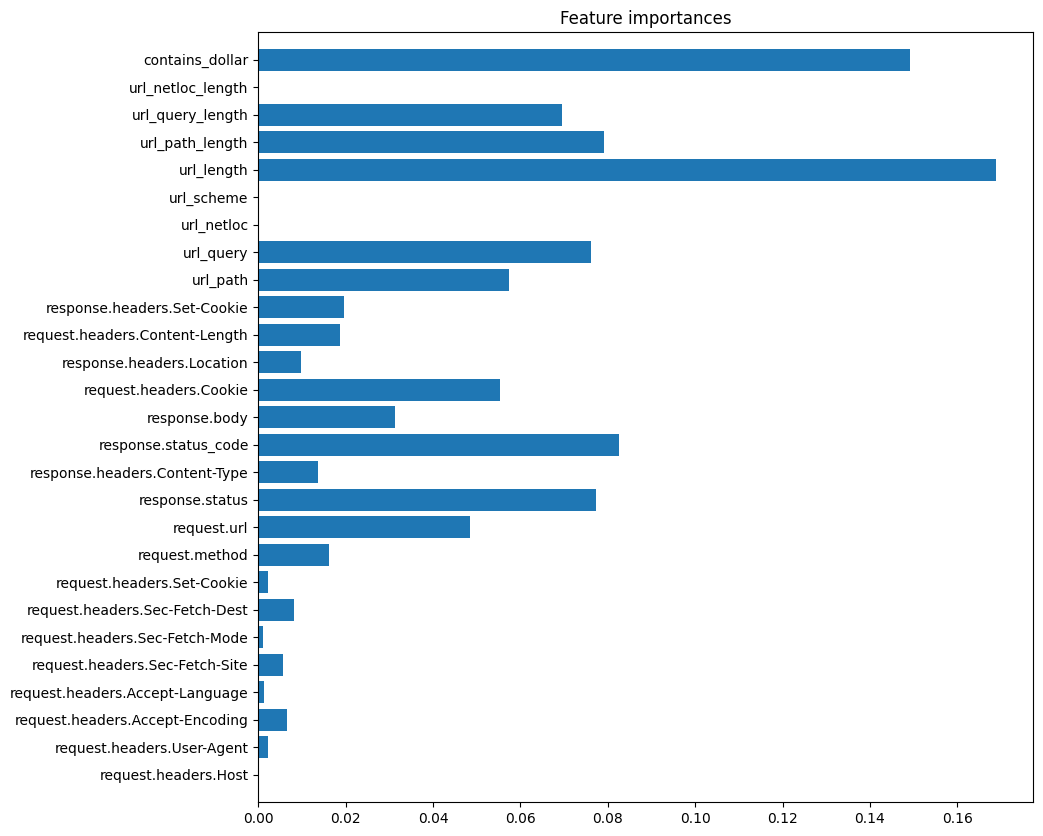

In [31]:
# Feature selection with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

etc_fs = ExtraTreesClassifier(n_estimators=100, random_state=42)
etc_fs.fit(x_train_pca, y_train)

plot_feature_importance(etc_fs)

In [32]:
# Print the feature ranking - Top 10
fs_table = pd.DataFrame(columns=['Feature', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'Linear SVC', 'Decision Tree', 'Extra Trees'])
fs_table['Feature'] = features_list
fs_table['Random Forest'] = rfc_fs.feature_importances_

fs_table['AdaBoost'] = abc_fs.feature_importances_
fs_table['Gradient Boosting'] = gbc_fs.feature_importances_
fs_table['Linear SVC'] = np.abs(lsvc.coef_[0])
fs_table['Decision Tree'] = dtc_fs.feature_importances_
fs_table['Extra Trees'] = etc_fs.feature_importances_

fs_table['Mean'] = fs_table.mean(axis=1)
fs_table.sort_values(by='Mean', ascending=False, inplace=True)
fs_table.head(15)

/tmp/ipykernel_36104/907717656.py:12: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,Feature,Random Forest,AdaBoost,Gradient Boosting,Linear SVC,Decision Tree,Extra Trees,Mean
22,url_length,0.175040,0.29,4.229637e-01,0.798017,0.445887,0.168953,0.383477
14,request.headers.Cookie,0.081469,0.12,3.205699e-01,0.897406,0.316521,0.055291,0.298543
26,contains_dollar,0.155950,0.15,2.293254e-01,0.550411,0.225594,0.149254,0.243422
10,response.status,0.045923,0.03,1.497348e-04,0.348638,0.000000,0.077228,0.083657
19,url_query,0.051664,0.00,1.364050e-14,0.373075,0.000000,0.076178,0.083486
23,url_path_length,0.074925,0.00,0.000000e+00,0.127993,0.000000,0.079188,0.047018
18,url_path,0.059232,0.08,8.108127e-03,0.049308,0.000000,0.057307,0.042326
9,request.url,0.078383,0.10,1.267440e-02,0.000000,0.011998,0.048391,0.041908
13,response.body,0.031679,0.18,1.550676e-03,0.000000,0.000000,0.031254,0.040747
12,response.status_code,0.074951,0.05,4.657997e-03,0.022958,0.000000,0.082578,0.039191


In [33]:
# x_train_pca = x_train_pca[:, fs_table['Mean'].head(15).index]
# x_test_pca = x_test_pca[:, fs_table['Mean'].head(15).index]

Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 27 features.
Fitting estimator with 25 features.
Fitting estimator with 26 features.
Fitting estimator with 24 features.
Fitting estimator with 25 features.
Fitting estimator with 23 features.
Fitting estimator with 24 features.
Fitting estimator with 22 features.
Fitting estimator with 23 features.
Fitting estimator with 21 features.
Fitting estimator with 22 features.
Fitting estimator with 20 features.
Fitting estimator with 21 features.
Fitting estimator with 19 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 16 features.
Fitting estimator with 14 features.
Fitting estimator with 15 features.
Fitting estimator with 13 fe

/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning:

The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.



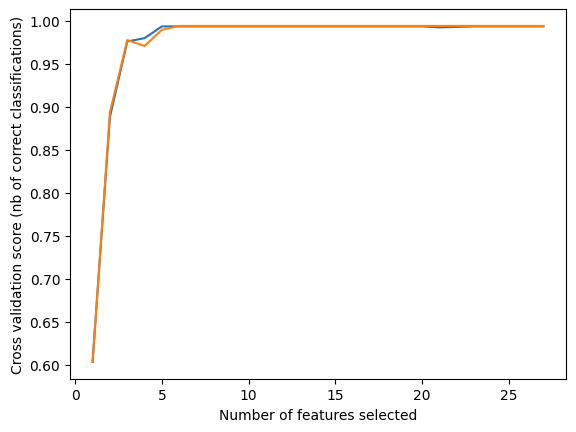

In [34]:
# Feature selection

from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
recall_scorer = make_scorer(recall_score, pos_label='Malware')
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=StratifiedKFold(2), scoring='accuracy', verbose=1, n_jobs=-1)
rfecv.fit(x_train_pca, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

x_train_pca = rfecv.transform(x_train_pca)
x_test_pca = rfecv.transform(x_test_pca)

In [35]:
def create_grid_search(model, params):
    # Create a grid search object which is used to find the best hyperparameters for the model
    return GridSearchCV(estimator=model, param_grid=params, n_jobs=-1, verbose=3, cv=3, scoring='accuracy', return_train_score=True)

In [36]:
# https://plotly.com/python/parallel-categories-diagram/

def plot_grid_search_results(results):

    df = pd.DataFrame(results)
    # Build parcats dimensions
    categorical_dimensions = [c for c in df.columns if "param_" in c]

    dimensions = [dict(values=df[label], label=label)for label in categorical_dimensions]

    # Build colorscale
    color = np.zeros(len(df), dtype='uint8')
    colorscale = [[0, 'gray'], [1, 'blue']]

    # Build figure as FigureWidget
    fig = go.FigureWidget(data=[go.Scatter(x=df['std_test_score'], y=df['mean_test_score'], marker={'color': 'gray'}, mode='markers', selected={'marker': {'color': 'blue'}}, unselected={'marker': {'opacity': 0.3}}), go.Parcats(domain={'y': [0, 0.4]}, dimensions=dimensions,line={'colorscale': colorscale, 'cmin': 0,'cmax': 1, 'color': color, 'shape': 'hspline'})])

    fig.update_layout(
        height=800, xaxis={'title': 'STD Score'},
        yaxis={'title': 'Mean Score', 'domain': [0.6, 1]},
        dragmode='lasso', hovermode='closest')

    # Update color callback
    def update_color(trace, points, state):
        # Update scatter selection
        fig.data[0].selectedpoints = points.point_inds

        # Update parcats colors
        new_color = np.zeros(len(df), dtype='uint8')
        new_color[points.point_inds] = 1
        fig.data[1].line.color = new_color

    # Register callback on scatter selection...
    fig.data[0].on_selection(update_color)
    # and parcats click
    fig.data[1].on_click(update_color)

    return fig

### Model Choosing & Fitting


#### Random Forest

Ensemble learning method that uses multiple decision trees to make predictions.
It is a robust and flexible model that can handle high-dimensional and complex data,making it a good choice for API classification tasks.

In [ ]:
rf = RandomForestClassifier()
rf_param = {
    "n_estimators": [150, 250, 750],
    "criterion": ["gini", "entropy"],
    "max_depth": [20],
    "min_samples_split": [2],
    "random_state": [43],
}
rf_gcv = create_grid_search(rf, rf_param)

In [38]:
rf_gcv.fit(x_train_pca, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 3/3] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=150, random_state=43;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 1/3] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=250, random_state=43;, score=(train=1.000, test=1.000) total time=   0.5s
[CV 1/3] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=150, random_state=43;, score=(train=1.000, test=1.000) total time=   0.3s
[CV 2/3] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=250, random_state=43;, score=(train=1.000, test=1.000) total time=   0.5s
[CV 2/3] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=150, random_state=43;, score=(train=1.000, test=1.000) total time=   0.4s
[CV 3/3] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=250, random_state=43;, score=(train=1.000, test=1.000) total time=   0.5s
[CV 1/3] END criterion=entropy, ma

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [20],
                         'min_samples_split': [2],
                         'n_estimators': [150, 250, 750],
                         'random_state': [43]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [39]:
# plot_grid_search_results(rf_gcv.cv_results_)

In [40]:
print("Best parameters: ", rf_gcv.best_params_)

Best parameters:  {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150, 'random_state': 43}


In [41]:
clf = rf_gcv.best_estimator_

In [42]:
# Save the model
filename = "Model/"+str(dataset_number)+"/rf"+str(dataset_number)+"_model.sav"
pickle.dump(clf, open(filename, 'wb'))

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       356
           1    1.00000   1.00000   1.00000       400

    accuracy                        1.00000       756
   macro avg    1.00000   1.00000   1.00000       756
weighted avg    1.00000   1.00000   1.00000       756



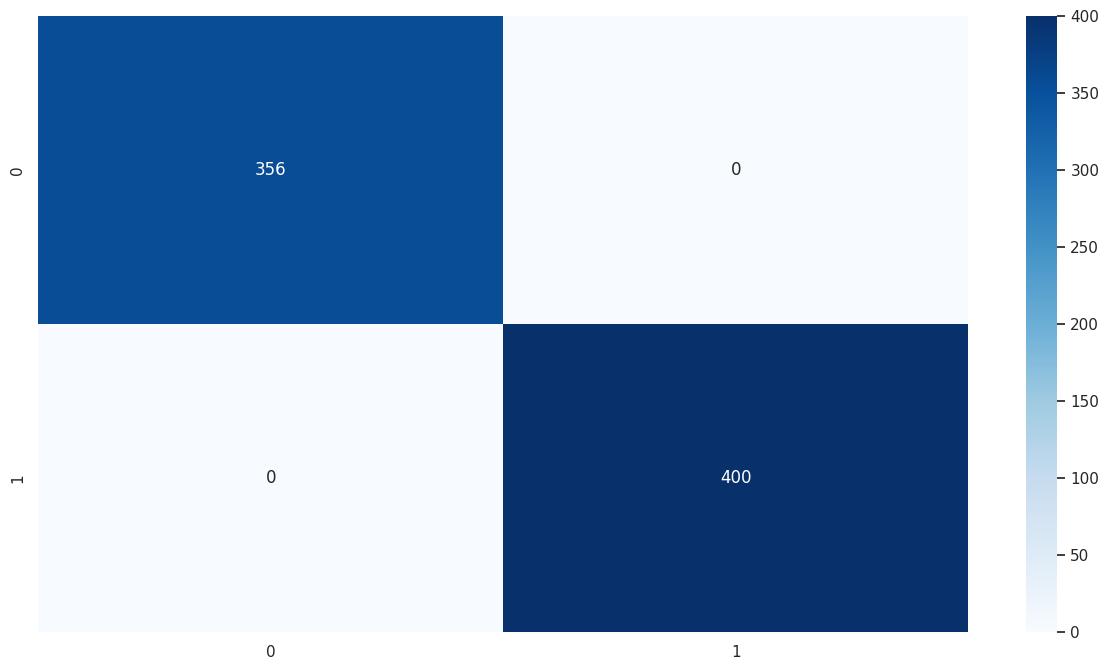

In [43]:
show(clf)

#### SVM - Support Vector Machines

Popular choice for classification tasks, including API classification.
They work by finding the hyperplane in a high-dimensional space that maximally separates different classes of data points.

In [44]:
svc = SVC(cache_size=500)
svc_param = {
    "C": [1, 2, 3],
    "kernel": ["poly", "rbf"],
    "probability": [True],
}
svc_gcv = create_grid_search(svc, svc_param)

In [45]:
svc_gcv.fit(x_train_pca, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END C=1, kernel=rbf, probability=True;, score=(train=0.995, test=0.992) total time=   0.2s
[CV 2/3] END C=1, kernel=poly, probability=True;, score=(train=0.978, test=0.987) total time=   0.2s
[CV 3/3] END C=1, kernel=poly, probability=True;, score=(train=0.981, test=0.981) total time=   0.3s
[CV 2/3] END C=1, kernel=rbf, probability=True;, score=(train=0.996, test=0.998) total time=   0.1s
[CV 1/3] END C=1, kernel=poly, probability=True;, score=(train=0.984, test=0.975) total time=   0.3s
[CV 3/3] END C=1, kernel=rbf, probability=True;, score=(train=0.997, test=0.997) total time=   0.1s
[CV 1/3] END C=2, kernel=poly, probability=True;, score=(train=0.987, test=0.980) total time=   0.1s
[CV 2/3] END C=2, kernel=poly, probability=True;, score=(train=0.978, test=0.987) total time=   0.1s
[CV 2/3] END C=2, kernel=rbf, probability=True;, score=(train=0.996, test=0.998) total time=   0.1s
[CV 3/3] END C=2, kernel=poly, prob

GridSearchCV(cv=3, estimator=SVC(cache_size=500), n_jobs=-1,
             param_grid={'C': [1, 2, 3], 'kernel': ['poly', 'rbf'],
                         'probability': [True]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [46]:
# plot_grid_search_results(svc_gcv.cv_results_)

In [47]:
print("Best parameters: ", svc_gcv.best_params_)

Best parameters:  {'C': 3, 'kernel': 'rbf', 'probability': True}


In [48]:
svc = svc_gcv.best_estimator_

In [49]:
# Save the model
filename = "Model/"+str(dataset_number)+"/svc"+str(dataset_number)+"_model.sav"
pickle.dump(svc, open(filename, 'wb'))

              precision    recall  f1-score   support

           0    0.99441   1.00000   0.99720       356
           1    1.00000   0.99500   0.99749       400

    accuracy                        0.99735       756
   macro avg    0.99721   0.99750   0.99735       756
weighted avg    0.99737   0.99735   0.99735       756



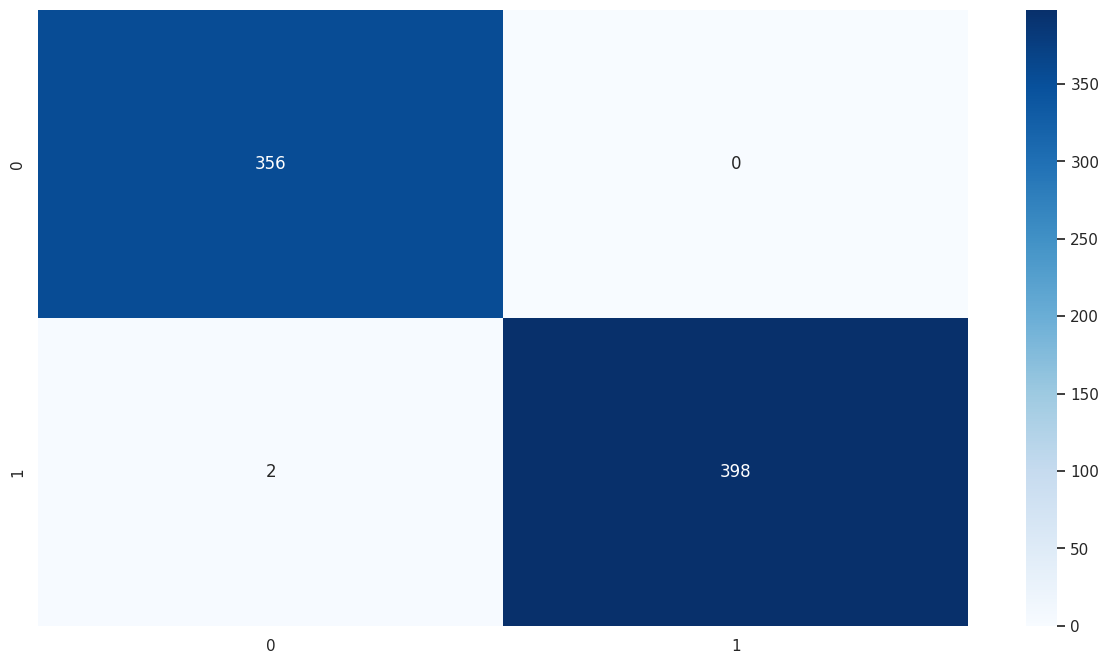

In [50]:
show(svc)

#### Logistic Regression

Simple yet effective linear model for classification tasks.
It is particularly useful for predicting binary outcomes (e.g., malicious vs benign) and is often used as a baseline model for comparison with more complex models.

In [ ]:
lr = LogisticRegression()
lr_param = {
    "C": [1, 2, 3],
    "penalty": ["l2"],
}
lr_gcv = create_grid_search(lr, lr_param)

In [52]:
lr_gcv.fit(x_train_pca, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 2/3] END C=1, penalty=l2;, score=(train=0.993, test=0.997) total time=   0.0s
[CV 3/3] END C=1, penalty=l2;, score=(train=0.994, test=0.993) total time=   0.0s
[CV 1/3] END C=1, penalty=l2;, score=(train=0.995, test=0.992) total time=   0.0s
[CV 1/3] END C=2, penalty=l2;, score=(train=0.995, test=0.992) total time=   0.0s
[CV 3/3] END C=2, penalty=l2;, score=(train=0.994, test=0.993) total time=   0.0s
[CV 2/3] END C=2, penalty=l2;, score=(train=0.996, test=0.998) total time=   0.0s
[CV 2/3] END C=3, penalty=l2;, score=(train=0.996, test=0.998) total time=   0.0s
[CV 1/3] END C=3, penalty=l2;, score=(train=0.995, test=0.992) total time=   0.0s
[CV 3/3] END C=3, penalty=l2;, score=(train=0.997, test=0.997) total time=   0.0s


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 2, 3], 'penalty': ['l2']},
             return_train_score=True, scoring='accuracy', verbose=3)

In [53]:
# plot_grid_search_results(lr_gcv.cv_results_)

In [54]:
print("Best parameters: ", lr_gcv.best_params_)

Best parameters:  {'C': 3, 'penalty': 'l2'}


In [55]:
lr = lr_gcv.best_estimator_

In [56]:
# Save the model
filename = "Model/"+str(dataset_number)+"/lr"+str(dataset_number)+"_model.sav"
pickle.dump(lr, open(filename, 'wb'))

              precision    recall  f1-score   support

           0    0.99441   1.00000   0.99720       356
           1    1.00000   0.99500   0.99749       400

    accuracy                        0.99735       756
   macro avg    0.99721   0.99750   0.99735       756
weighted avg    0.99737   0.99735   0.99735       756



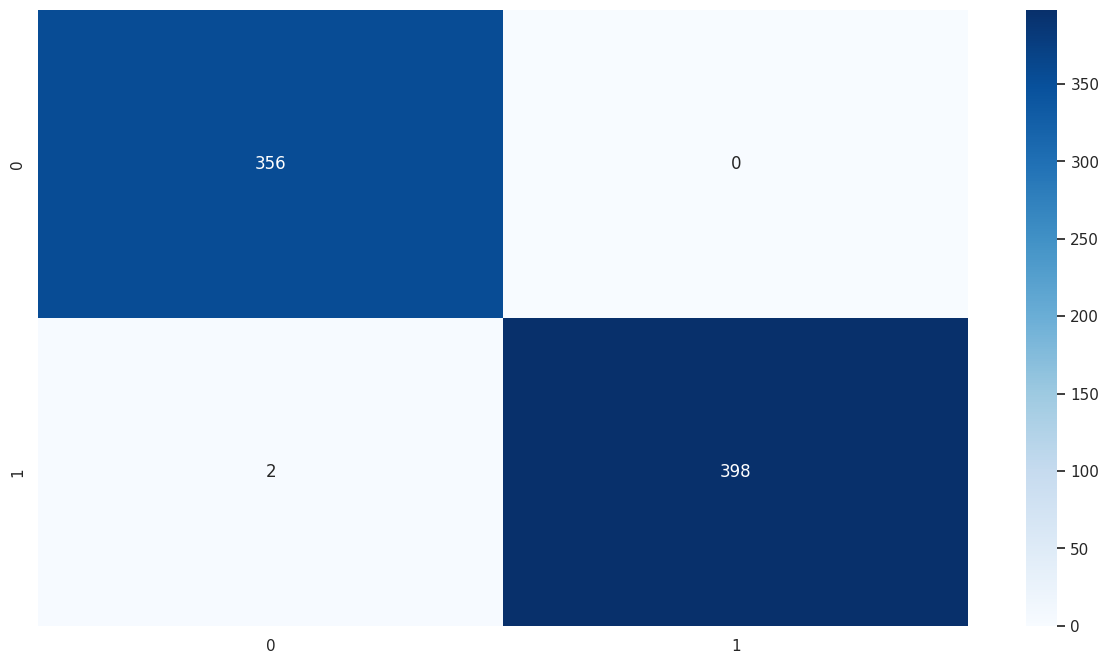

In [57]:
show(lr)

#### KNN

Simple yet effective classification algorithm that works by finding the k nearest neighbors of a data point.
It is a non-parametric model that does not make any assumptions about the underlying data distribution.


In [ ]:
knn = KNeighborsClassifier()
knn_param = {
    "n_neighbors": [3 ,4, 5, 7, 9, 11, 13, 15],
    "weights": ["uniform", "distance"],
}
knn_gcv = create_grid_search(knn, knn_param)

In [59]:
knn_gcv.fit(x_train_pca, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END n_neighbors=3, weights=distance;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/3] END n_neighbors=3, weights=distance;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 3/3] END n_neighbors=3, weights=distance;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/3] END n_neighbors=3, weights=uniform;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 2/3] END n_neighbors=3, weights=uniform;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 3/3] END n_neighbors=3, weights=uniform;, score=(train=1.000, test=1.000) total time=   0.2s
[CV 2/3] END n_neighbors=4, weights=distance;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 3/3] END n_neighbors=4, weights=distance;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/3] END n_neighbors=4, weights=uniform;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 2/3] END n_neighbors=4, weights=uniform;, score=(train=1.

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 4, 5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy', verbose=3)

In [60]:
# plot_grid_search_results(knn_gcv.cv_results_)

In [61]:
print("Best parameters: ", knn_gcv.best_params_)

Best parameters:  {'n_neighbors': 3, 'weights': 'uniform'}


In [62]:
knn = knn_gcv.best_estimator_

In [63]:
# Save the model
filename = "Model/"+str(dataset_number)+"/knn"+str(dataset_number)+"_model.sav"
pickle.dump(knn, open(filename, 'wb'))

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       356
           1    1.00000   1.00000   1.00000       400

    accuracy                        1.00000       756
   macro avg    1.00000   1.00000   1.00000       756
weighted avg    1.00000   1.00000   1.00000       756



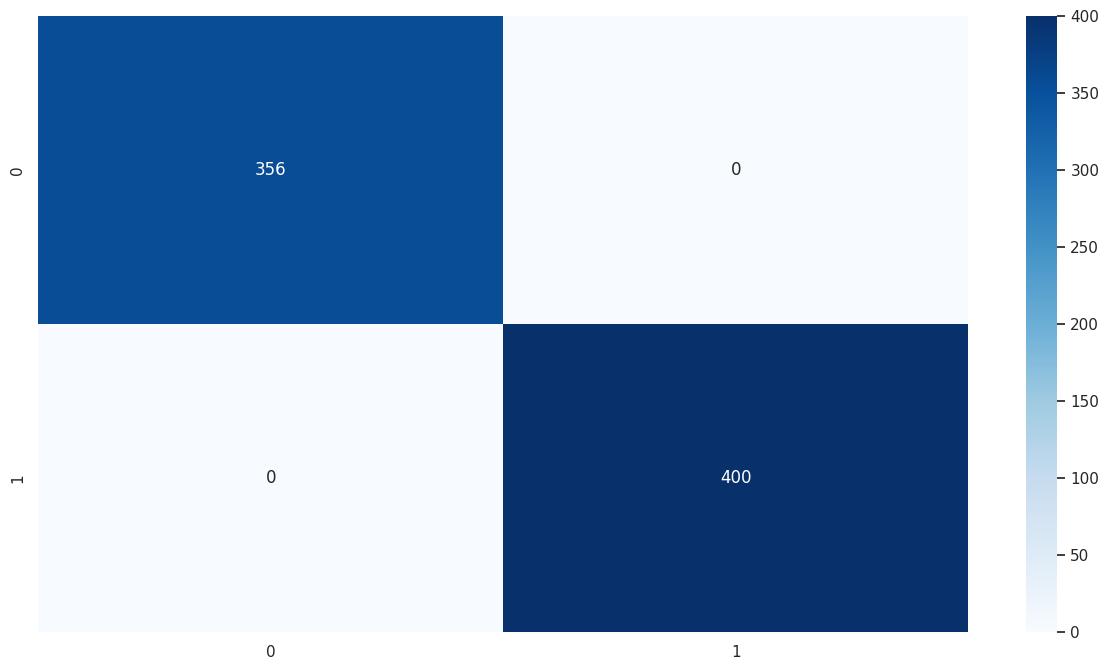

In [64]:
show(knn)

#### Decision Trees

Popular choice for classification tasks.
They work by recursively partitioning the feature space into smaller and smaller regions, until each region contains only a single class of data points.


In [ ]:
dt = DecisionTreeClassifier()
dt_param = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7, 9, 11, 13, 15],
    "min_samples_split": [2, 3, 4, 5, 6, 7, 8, 9, 10],
}
dt_gcv = create_grid_search(dt, dt_param)

In [66]:
dt_gcv.fit(x_train_pca, y_train)

Fitting 3 folds for each of 126 candidates, totalling 378 fits
[CV 1/3] END criterion=gini, max_depth=3, min_samples_split=2;, score=(train=0.992, test=0.987) total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=3, min_samples_split=2;, score=(train=0.989, test=0.993) total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=3, min_samples_split=2;, score=(train=0.990, test=0.991) total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=3, min_samples_split=3;, score=(train=0.992, test=0.987) total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=3, min_samples_split=3;, score=(train=0.989, test=0.993) total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=3, min_samples_split=3;, score=(train=0.990, test=0.991) total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=3, min_samples_split=4;, score=(train=0.989, test=0.993) total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=3, min_samples_split=4;, score=(train=0.992, test=0.987) total time=   0.0s
[CV 3/3] END crit

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11, 13, 15],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [67]:
# plot_grid_search_results(dt_gcv.cv_results_)

In [68]:
print("Best parameters: ", dt_gcv.best_params_)

Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}


In [69]:
dt = dt_gcv.best_estimator_

In [70]:
# Save the model
filename = "Model/"+str(dataset_number)+"/dt"+str(dataset_number)+"_model.sav"
pickle.dump(dt, open(filename, 'wb'))

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       356
           1    1.00000   1.00000   1.00000       400

    accuracy                        1.00000       756
   macro avg    1.00000   1.00000   1.00000       756
weighted avg    1.00000   1.00000   1.00000       756



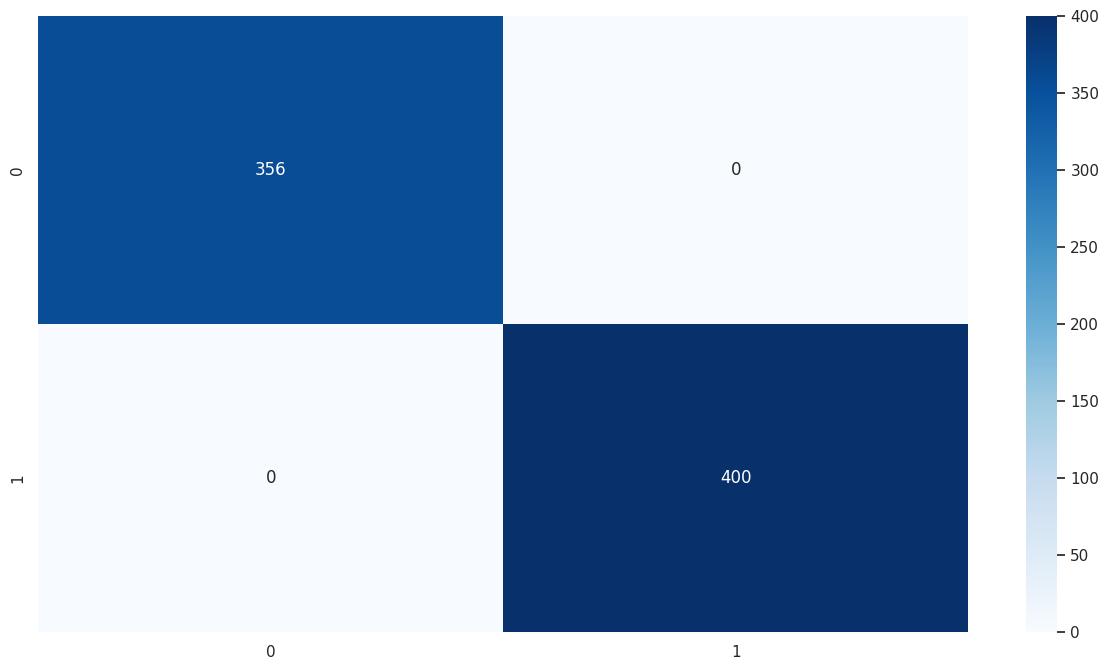

In [71]:
show(dt)

#### AdaBoost

Popular ensemble method that works by combining the predictions of multiple weak learners.
It is a simple way to improve the performance of a model by combining the predictions of multiple models.

In [ ]:
abc = AdaBoostClassifier()
abc_param = {
    "n_estimators": [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
    "learning_rate": [0.001, 0.01, 0.1, 1, 10, 100],
}
abc_gcv = create_grid_search(abc, abc_param)

In [73]:
abc_gcv.fit(x_train_pca, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV 1/3] END learning_rate=0.001, n_estimators=50;, score=(train=0.927, test=0.918) total time=   0.1s
[CV 3/3] END learning_rate=0.001, n_estimators=50;, score=(train=0.921, test=0.929) total time=   0.2s
[CV 2/3] END learning_rate=0.001, n_estimators=50;, score=(train=0.795, test=0.784) total time=   0.2s
[CV 1/3] END learning_rate=0.001, n_estimators=100;, score=(train=0.927, test=0.918) total time=   0.3s
[CV 2/3] END learning_rate=0.001, n_estimators=100;, score=(train=0.923, test=0.925) total time=   0.3s
[CV 3/3] END learning_rate=0.001, n_estimators=100;, score=(train=0.921, test=0.929) total time=   0.3s
[CV 1/3] END learning_rate=0.001, n_estimators=150;, score=(train=0.992, test=0.987) total time=   0.4s
[CV 2/3] END learning_rate=0.001, n_estimators=150;, score=(train=0.989, test=0.993) total time=   0.4s
[CV 3/3] END learning_rate=0.001, n_estimators=150;, score=(train=0.990, test=0.991) total time=   0.4s
[CV 2

/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:626: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:626: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting

[CV 2/3] END learning_rate=100, n_estimators=250;, score=(train=0.529, test=0.529) total time=   0.0s
[CV 3/3] END learning_rate=100, n_estimators=250;, score=(train=0.529, test=0.529) total time=   0.0s
[CV 1/3] END learning_rate=100, n_estimators=300;, score=(train=0.529, test=0.529) total time=   0.0s
[CV 2/3] END learning_rate=100, n_estimators=300;, score=(train=0.529, test=0.529) total time=   0.0s
[CV 3/3] END learning_rate=100, n_estimators=300;, score=(train=0.529, test=0.529) total time=   0.0s
[CV 1/3] END learning_rate=100, n_estimators=350;, score=(train=0.529, test=0.529) total time=   0.0s
[CV 2/3] END learning_rate=100, n_estimators=350;, score=(train=0.529, test=0.529) total time=   0.0s
[CV 1/3] END learning_rate=10, n_estimators=500;, score=(train=0.529, test=0.529) total time=   1.7s
[CV 1/3] END learning_rate=100, n_estimators=400;, score=(train=0.529, test=0.529) total time=   0.0s
[CV 3/3] END learning_rate=100, n_estimators=350;, score=(train=0.529, test=0.529) 

/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:626: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:626: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(
/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting

[CV 3/3] END learning_rate=10, n_estimators=500;, score=(train=0.529, test=0.529) total time=   1.6s


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450, 500]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [74]:
# plot_grid_search_results(abc_gcv.cv_results_)

In [75]:
print("Best parameters: ", abc_gcv.best_params_)

Best parameters:  {'learning_rate': 0.1, 'n_estimators': 100}


In [76]:
abc = abc_gcv.best_estimator_

In [77]:
# Save the model
filename = "Model/"+str(dataset_number)+"/abc"+str(dataset_number)+"_model.sav"
pickle.dump(abc, open(filename, 'wb'))

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       356
           1    1.00000   1.00000   1.00000       400

    accuracy                        1.00000       756
   macro avg    1.00000   1.00000   1.00000       756
weighted avg    1.00000   1.00000   1.00000       756



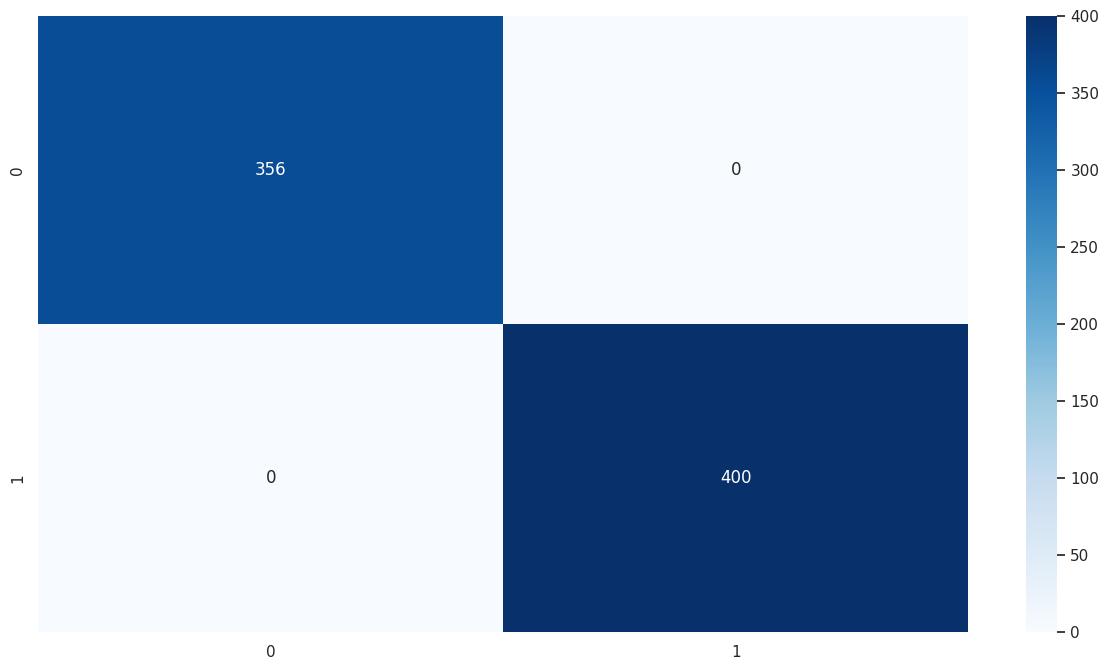

In [78]:
show(abc)

#### Gradient Boosting

Popular ensemble method that works by combining the predictions of multiple weak learners.
It is a simple way to improve the performance of a model by combining the predictions of multiple models.


In [ ]:
gbc = GradientBoostingClassifier()
gbc_param = {
    "n_estimators": [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
    "learning_rate": [0.001, 0.01, 0.1, 1, 10, 100],
}
gbc_gcv = create_grid_search(gbc, gbc_param)

In [80]:
gbc_gcv.fit(x_train_pca, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV 1/3] END learning_rate=0.001, n_estimators=50;, score=(train=0.529, test=0.529) total time=   0.1s
[CV 2/3] END learning_rate=0.001, n_estimators=50;, score=(train=0.529, test=0.529) total time=   0.1s
[CV 3/3] END learning_rate=0.001, n_estimators=50;, score=(train=0.529, test=0.529) total time=   0.2s
[CV 1/3] END learning_rate=0.001, n_estimators=100;, score=(train=0.992, test=0.987) total time=   0.2s
[CV 2/3] END learning_rate=0.001, n_estimators=100;, score=(train=0.989, test=0.993) total time=   0.3s
[CV 3/3] END learning_rate=0.001, n_estimators=100;, score=(train=0.990, test=0.991) total time=   0.4s
[CV 1/3] END learning_rate=0.001, n_estimators=150;, score=(train=0.992, test=0.987) total time=   0.4s
[CV 2/3] END learning_rate=0.001, n_estimators=150;, score=(train=0.989, test=0.993) total time=   0.4s
[CV 3/3] END learning_rate=0.001, n_estimators=150;, score=(train=0.990, test=0.991) total time=   0.3s
[CV 2

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450, 500]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [81]:
# plot_grid_search_results(gbc_gcv.cv_results_)

In [82]:
print("Best parameters: ", gbc_gcv.best_params_)

Best parameters:  {'learning_rate': 0.01, 'n_estimators': 200}


In [83]:
gbc = gbc_gcv.best_estimator_

In [84]:
# Save the model
filename = "Model/"+str(dataset_number)+"/gbc"+str(dataset_number)+"_model.sav"
pickle.dump(gbc, open(filename, 'wb'))

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       356
           1    1.00000   1.00000   1.00000       400

    accuracy                        1.00000       756
   macro avg    1.00000   1.00000   1.00000       756
weighted avg    1.00000   1.00000   1.00000       756



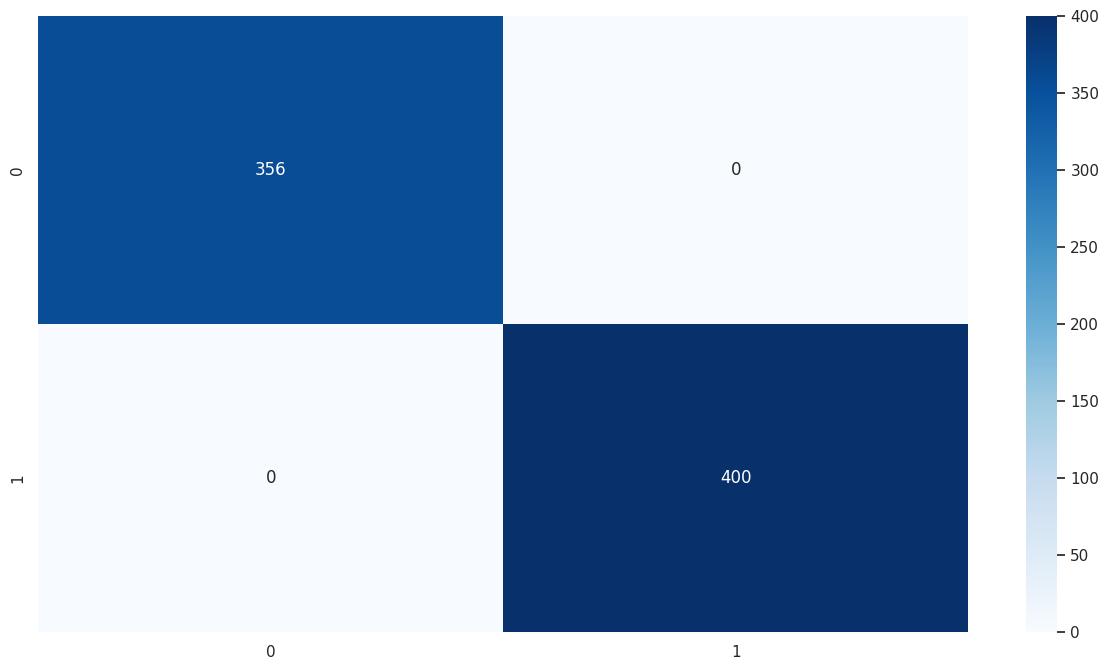

In [85]:
show(gbc)

#### Neural Networks

popular choice for classification tasks.
They work by learning the weights of the connections between neurons in the network.

In [ ]:
mlp = MLPClassifier()
mlp_param = {
    "hidden_layer_sizes": [(100, 100, 100, 100, 100), (100, 100, 100, 100, 100, 100)],
    "activation": ["relu"],
    "solver": ["adam"],
    "alpha": [0.0001, 0.001, 0.01, 0.1, 1],
    "learning_rate": ["constant", "invscaling", "adaptive"],
}
mlp_gcv = create_grid_search(mlp, mlp_param)

In [87]:
mlp_gcv.fit(x_train_pca, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV 1/3] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate=invscaling, solver=adam;, score=(train=1.000, test=1.000) total time=   2.0s
[CV 2/3] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate=constant, solver=adam;, score=(train=1.000, test=1.000) total time=   2.3s
[CV 3/3] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate=constant, solver=adam;, score=(train=1.000, test=1.000) total time=   2.3s
[CV 1/3] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate=constant, solver=adam;, score=(train=1.000, test=1.000) total time=   2.7s
[CV 2/3] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate=invscaling, solver=adam;, score=(train=1.000, test=1.000) total time=   1.9s
[CV 3/3] END activation=relu, alpha=0.00

GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu'],
                         'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'hidden_layer_sizes': [(100, 100, 100, 100, 100),
                                                (100, 100, 100, 100, 100, 100)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'solver': ['adam']},
             return_train_score=True, scoring='accuracy', verbose=3)

In [88]:
# plot_grid_search_results(mlp_gcv.cv_results_)

In [89]:
print("Best parameters: ", mlp_gcv.best_params_)

Best parameters:  {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100, 100, 100, 100), 'learning_rate': 'constant', 'solver': 'adam'}


In [90]:
mlp = mlp_gcv.best_estimator_

In [91]:
# Save the model
filename = "Model/"+str(dataset_number)+"/mlp"+str(dataset_number)+"_model.sav"
pickle.dump(mlp, open(filename, 'wb'))

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       356
           1    1.00000   1.00000   1.00000       400

    accuracy                        1.00000       756
   macro avg    1.00000   1.00000   1.00000       756
weighted avg    1.00000   1.00000   1.00000       756



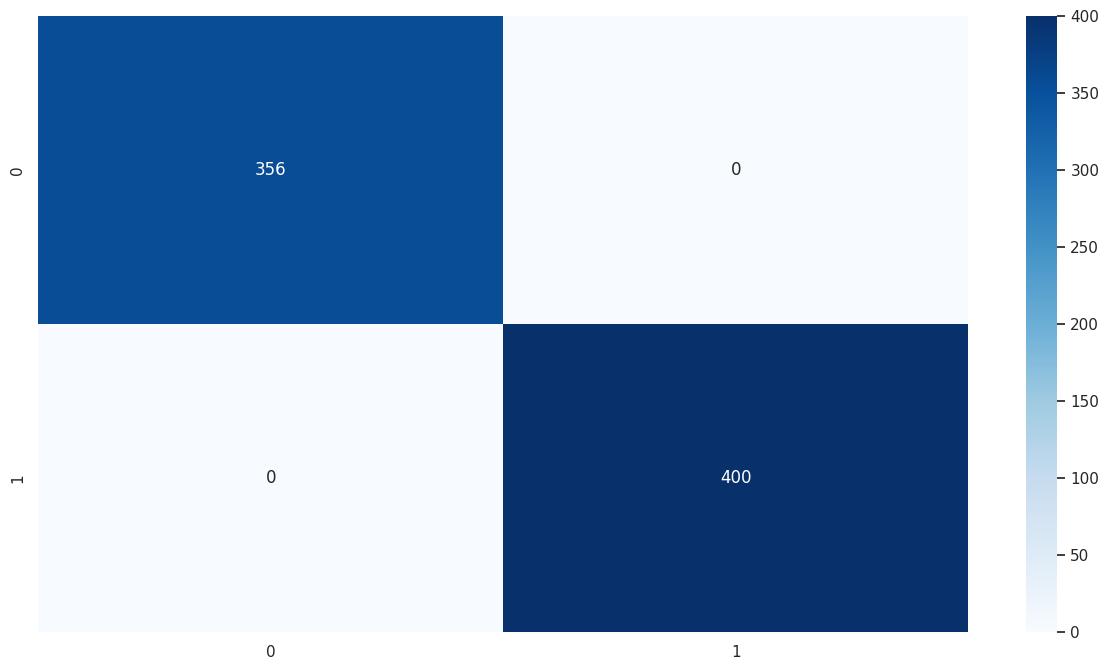

In [92]:
show(mlp)

#### Voting Classifier

Meta-classifier that combines the predictions of multiple classifiers.
It is a simple way to improve the performance of a model by combining the predictions of multiple models.


In [ ]:
vc = VotingClassifier(estimators=[("clf",clf),("svc",svc),("lr",lr),("knn",knn),("dt",dt),("abc",abc),("gbc",gbc),("mlp",mlp)])
vc_param = {
    "weights": [[1,1,1,1,1,1,1,1], [2,1,1,1,1,1,1,1], [1,2,1,1,1,1,1,1], [1,1,2,1,1,1,1,1], [1,1,1,2,1,1,1,1], [1,1,1,1,2,1,1,1], [1,1,1,1,1,2,1,1], [1,1,1,1,1,1,2,1], [1,1,1,1,1,1,1,2]],
    "voting": ["hard", "soft"],
}
vc_gcv = create_grid_search(vc, vc_param)

In [94]:
vc_gcv.fit(x_train_pca, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 3/3] END voting=hard, weights=[1, 1, 1, 1, 1, 1, 1, 1];, score=(train=1.000, test=1.000) total time=   4.7s
[CV 1/3] END voting=hard, weights=[2, 1, 1, 1, 1, 1, 1, 1];, score=(train=1.000, test=1.000) total time=   5.0s
[CV 1/3] END voting=hard, weights=[1, 1, 1, 1, 1, 1, 1, 1];, score=(train=1.000, test=1.000) total time=   5.7s
[CV 2/3] END voting=hard, weights=[1, 1, 1, 1, 1, 1, 1, 1];, score=(train=1.000, test=1.000) total time=   5.9s
[CV 2/3] END voting=hard, weights=[2, 1, 1, 1, 1, 1, 1, 1];, score=(train=1.000, test=1.000) total time=   5.6s
[CV 3/3] END voting=hard, weights=[2, 1, 1, 1, 1, 1, 1, 1];, score=(train=1.000, test=1.000) total time=   5.6s
[CV 1/3] END voting=hard, weights=[1, 2, 1, 1, 1, 1, 1, 1];, score=(train=1.000, test=1.000) total time=   5.5s
[CV 2/3] END voting=hard, weights=[1, 2, 1, 1, 1, 1, 1, 1];, score=(train=1.000, test=1.000) total time=   5.4s
[CV 3/3] END voting=hard, weights=[1, 2, 1,

GridSearchCV(cv=3,
             estimator=VotingClassifier(estimators=[('clf',
                                                     RandomForestClassifier(max_depth=20,
                                                                            n_estimators=150,
                                                                            random_state=43)),
                                                    ('svc',
                                                     SVC(C=3, cache_size=500,
                                                         probability=True)),
                                                    ('lr',
                                                     LogisticRegression(C=3)),
                                                    ('knn',
                                                     KNeighborsClassifier(n_neighbors=3)),
                                                    ('dt',
                                                     DecisionTreeClassifier(max_depth=5)),
                                                    ('abc',
                                                     AdaBoostClassifier(learning_rate=0.1,
                                                                        n_es...
                                                                                n_estimators=200)),
                                                    ('mlp',
                                                     MLPClassifier(hidden_layer_sizes=(100,
                                                                                       100,
                                                                                       100,
                                                                                       100,
                                                                                       100)))]),
             n_jobs=-1,
             param_grid={'voting': ['hard', 'soft'],
                         'weights': [[1, 1, 1, 1, 1, 1, 1, 1],
                                     [2, 1, 1, 1, 1, 1, 1, 1],
                                     [1, 2, 1, 1, 1, 1, 1, 1],
                                     [1, 1, 2, 1, 1, 1, 1, 1],
                                     [1, 1, 1, 2, 1, 1, 1, 1],
                                     [1, 1, 1, 1, 2, 1, 1, 1],
                                     [1, 1, 1, 1, 1, 2, 1, 1],
                                     [1, 1, 1, 1, 1, 1, 2, 1],
                                     [1, 1, 1, 1, 1, 1, 1, 2]]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [95]:
# plot_grid_search_results(vc_gcv.cv_results_)

In [96]:
print("Best parameters: ", vc_gcv.best_params_)

Best parameters:  {'voting': 'hard', 'weights': [1, 1, 1, 1, 1, 1, 1, 1]}


In [97]:
vc = vc_gcv.best_estimator_

In [98]:
# Save the model
filename = "Model/"+str(dataset_number)+"/vc"+str(dataset_number)+"_model.sav"
pickle.dump(vc, open(filename, 'wb'))

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       356
           1    1.00000   1.00000   1.00000       400

    accuracy                        1.00000       756
   macro avg    1.00000   1.00000   1.00000       756
weighted avg    1.00000   1.00000   1.00000       756



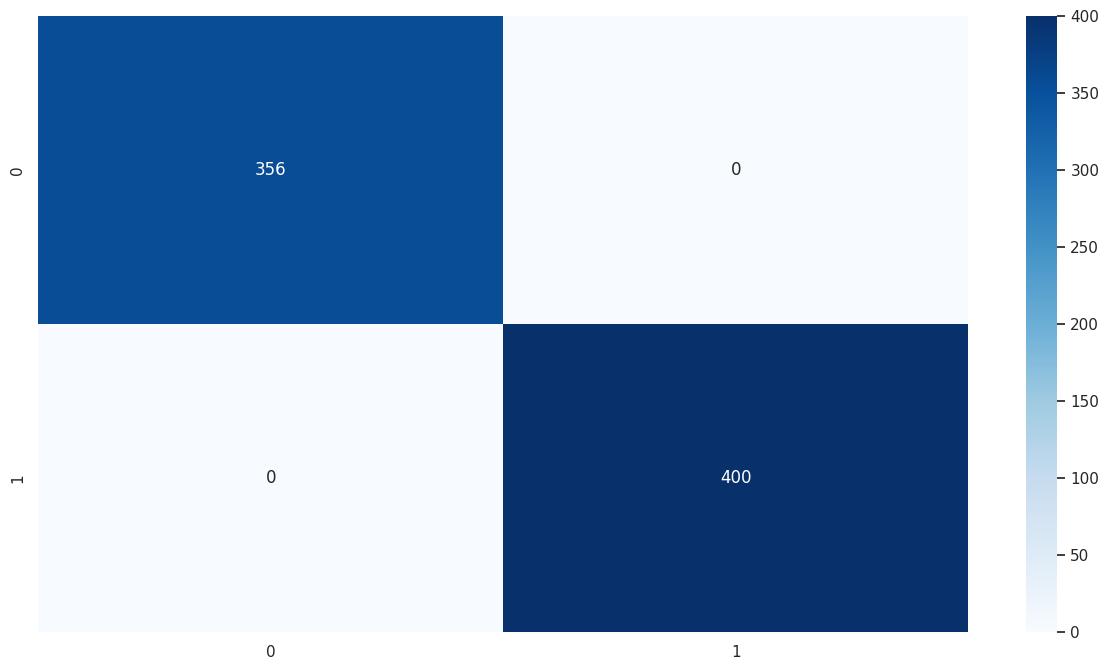

In [99]:
show(vc)

#### Stacking Classifier

Meta-classifier that combines the predictions of multiple classifiers.
It is a simple way to improve the performance of a model by combining the predictions of multiple models.


In [ ]:
sc = StackingClassifier(estimators=[("clf",clf),("svc",svc),("lr",lr),("knn",knn),("dt",dt),("abc",abc),("gbc",gbc),("mlp",mlp)], final_estimator=LogisticRegression())
sc_param = {
    "final_estimator__C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
}
sc_gcv = create_grid_search(sc, sc_param)

In [101]:
# Print size of x_train_pca
print(x_train_pca.shape)


(3526, 6)


In [102]:
sc_gcv.fit(x_train_pca, y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV 3/3] END final_estimator__C=0.001;, score=(train=1.000, test=1.000) total time=  20.2s
[CV 1/3] END final_estimator__C=0.001;, score=(train=1.000, test=1.000) total time=  20.2s
[CV 1/3] END final_estimator__C=0.01;, score=(train=1.000, test=1.000) total time=  20.9s
[CV 2/3] END final_estimator__C=0.001;, score=(train=1.000, test=1.000) total time=  21.7s
[CV 3/3] END final_estimator__C=0.01;, score=(train=1.000, test=1.000) total time=  18.5s
[CV 2/3] END final_estimator__C=0.01;, score=(train=1.000, test=1.000) total time=  19.0s
[CV 1/3] END final_estimator__C=0.1;, score=(train=1.000, test=1.000) total time=  18.6s
[CV 2/3] END final_estimator__C=0.1;, score=(train=1.000, test=1.000) total time=  20.7s
[CV 3/3] END final_estimator__C=0.1;, score=(train=1.000, test=1.000) total time=  20.8s
[CV 2/3] END final_estimator__C=1;, score=(train=1.000, test=1.000) total time=  20.0s
[CV 1/3] END final_estimator__C=1;, score=(

GridSearchCV(cv=3,
             estimator=StackingClassifier(estimators=[('clf',
                                                       RandomForestClassifier(max_depth=20,
                                                                              n_estimators=150,
                                                                              random_state=43)),
                                                      ('svc',
                                                       SVC(C=3, cache_size=500,
                                                           probability=True)),
                                                      ('lr',
                                                       LogisticRegression(C=3)),
                                                      ('knn',
                                                       KNeighborsClassifier(n_neighbors=3)),
                                                      ('dt',
                                                       DecisionTreeClassifier(max_depth=5)),
                                                      ('abc',
                                                       AdaBoostClassifier(learning_rate=0.1,
                                                                          n_estimators=100)),
                                                      ('gbc',
                                                       GradientBoostingClassifier(learning_rate=0.01,
                                                                                  n_estimators=200)),
                                                      ('mlp',
                                                       MLPClassifier(hidden_layer_sizes=(100,
                                                                                         100,
                                                                                         100,
                                                                                         100,
                                                                                         100)))],
                                          final_estimator=LogisticRegression()),
             n_jobs=-1,
             param_grid={'final_estimator__C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                1000]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [103]:
# plot_grid_search_results(sc_gcv.cv_results_)

In [104]:
print("Best parameters: ", sc_gcv.best_params_)

Best parameters:  {'final_estimator__C': 0.001}


In [105]:
sc = sc_gcv.best_estimator_

In [106]:
# Save the model
filename = "Model/"+str(dataset_number)+"/sc"+str(dataset_number)+"_model.sav"
pickle.dump(sc, open(filename, 'wb'))

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       356
           1    1.00000   1.00000   1.00000       400

    accuracy                        1.00000       756
   macro avg    1.00000   1.00000   1.00000       756
weighted avg    1.00000   1.00000   1.00000       756



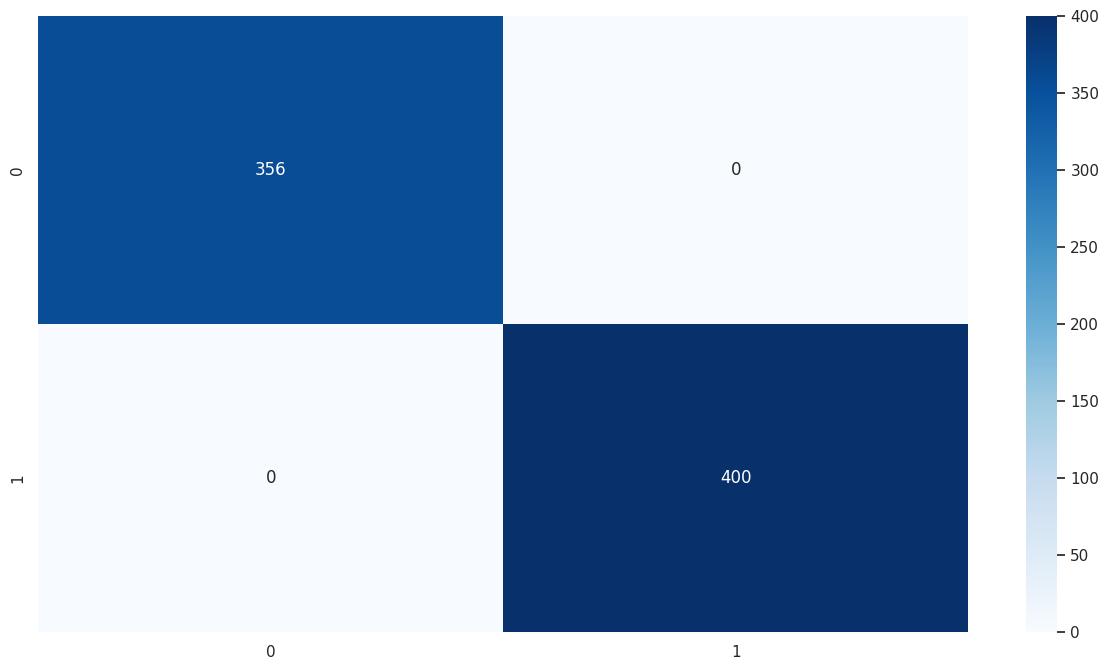

In [107]:
show(sc)

### Choose The Best Model


In [ ]:
models = [clf,svc,lr,knn,dt,abc,gbc,mlp,vc,sc]
model_names = ["Random Forest","SVM","Logistic Regression","KNN","Decision Tree","AdaBoost","Gradient Boosting","Neural Network","Voting Classifier","Stacking Classifier"]
model_scores = []

for model in models:
    predictions = model.predict(x_test_pca)
    true_labels = y_test
    model_report = classification_report(true_labels, predictions, digits=5)
    model_scores.append(model_report.split()[12])

best_model = models[model_scores.index(max(model_scores))]
best_model_name = model_names[model_scores.index(max(model_scores))]
best_model_score = max(model_scores)
print("Best model: " + best_model_name)
print("Score: " + str(best_model_score))
model_report = classification_report(true_labels, predictions, digits=5)
print(model_report)

#### Result


In [110]:
def show(model):
    # We print our results
    sns.set(rc={'figure.figsize': (15, 8)})
    predictions = model.predict(x_test_pca)
    true_labels = y_test
    cf_matrix = confusion_matrix(true_labels, predictions)
    model_report = classification_report(true_labels, predictions, digits=5)
    heatmap = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(true_labels), yticklabels=np.unique(true_labels))

    # The heatmap is cool but this is the most important result
    print(model_report)

## Test


In [125]:
# Now it's your turn, use the model you have just created :)

# Read the valuation json, preprocess it and run your model
with open(f'./dataset_{str(dataset_number)}_val.json') as file:
    raw_ds = json.load(file)
test_df = pd.json_normalize(raw_ds, max_level=2)

# Preprocess the validation dataset, remember that here you don't have the labels
# Remove all NAN columns or replace with desired string
# This loop iterates over all of the column names which are all NaN
for column in test_df.columns[test_df.isna().any()].tolist():
    test_df[column] = test_df[column].fillna('None')

create_features(test_df)
test_df = vectorize_df(test_df)

X = test_df[features_list].to_numpy()
X = ss.transform(X)
X = rfecv.transform(X)
predictions = clf.predict(X)

/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



### Save predictions

In [159]:
enc = LabelEncoder()
np.savetxt(f'./dataset_{str(dataset_number)}_{test_type}_result.txt', enc.fit_transform(predictions), fmt='%2d')